This code does ...

In [1]:
# This code imports some libraries that you will need. 
# You should not need to modify it, though you are expected to make other imports later in your code.

# Common imports
import sys
import numpy as np
import time
import pandas as pd
import sklearn
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import re

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

In [2]:
AIS_data = pd.read_csv("all_messages.csv")

In [3]:
#AIS_data.head()

In [4]:
#AIS_data.describe()

In [5]:
AIS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 74 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   msg_type      1435 non-null   int64  
 1   repeat        1435 non-null   int64  
 2   mmsi          1435 non-null   object 
 3   year          139 non-null    float64
 4   month         198 non-null    float64
 5   day           198 non-null    float64
 6   hour          198 non-null    float64
 7   minute        198 non-null    float64
 8   second        1268 non-null   float64
 9   accuracy      1268 non-null   float64
 10  lon           1268 non-null   float64
 11  lat           1268 non-null   float64
 12  epfd          258 non-null    float64
 13  spare         1246 non-null   object 
 14  raim          1268 non-null   object 
 15  radio         1208 non-null   float64
 16  time          1435 non-null   int64  
 17  ais_version   59 non-null     float64
 18  imo           59 non-null   

In [6]:
#Create new dataframes where only  1 feature is used along with message type and MMSI (keep all rows at this stage)
#The features that will be investigated are: time,speed,lat & lon
speed_columns = [0,2,31] #msg_type, mmsi and speed
speed_data = AIS_data.iloc[:, speed_columns]

In [7]:
speed_data

,msg_type,mmsi,speed
0,4,002766160-A-4,NaN
1,5,636020457-B-5,NaN
2,1,276538000-B-1-UnderWayUsingEngine,0.0
3,18,276007420-A-18,23.6
4,1,276643000-A-1-EngagedInFishing,0.9
...,...,...,...
1430,1,276330000-A-1-UnderWayUsingEngine,0.0
1431,1,276003580-A-1-UnderWayUsingEngine,0.0
1432,1,276829000-A-1-UnderWayUsingEngine,22.1
1433,21,992761005-A-21,NaN


In [8]:
time_columns = [0,2,16] #msg_type, mmsi and time

In [9]:
time_data = AIS_data.iloc[:, time_columns]

In [10]:
#time_data

In [11]:
lon_lat_columns = [0,2,10,11] #msg_type, mmsi and time

In [12]:
lon_lat_data = AIS_data.iloc[:, lon_lat_columns]

In [13]:
lon_lat_data

,msg_type,mmsi,lon,lat
0,4,002766160-A-4,25.500053,59.645888
1,5,636020457-B-5,NaN,NaN
2,1,276538000-B-1-UnderWayUsingEngine,24.713998,59.462525
3,18,276007420-A-18,24.759658,59.555717
4,1,276643000-A-1-EngagedInFishing,24.347427,59.573597
...,...,...,...,...
1430,1,276330000-A-1-UnderWayUsingEngine,24.792167,59.558783
1431,1,276003580-A-1-UnderWayUsingEngine,24.669495,59.451380
1432,1,276829000-A-1-UnderWayUsingEngine,24.753918,59.694997
1433,21,992761005-A-21,25.072603,59.628142


In [14]:
#Step 3 - Remove all values that are missing eg. NaN values
#speed_data
final_speed_data = speed_data.dropna()

In [15]:
final_speed_data

,msg_type,mmsi,speed
2,1,276538000-B-1-UnderWayUsingEngine,0.0
3,18,276007420-A-18,23.6
4,1,276643000-A-1-EngagedInFishing,0.9
5,1,276841000-B-1-UnderWayUsingEngine,0.0
6,1,276003580-A-1-UnderWayUsingEngine,0.0
...,...,...,...
1428,1,276538000-B-1-UnderWayUsingEngine,0.0
1430,1,276330000-A-1-UnderWayUsingEngine,0.0
1431,1,276003580-A-1-UnderWayUsingEngine,0.0
1432,1,276829000-A-1-UnderWayUsingEngine,22.1


In [16]:
#what message types contain speed data
np.unique(final_speed_data["msg_type"])

array([ 1,  3, 18], dtype=int64)

In [17]:
#only rows where msg_type = 1
msg_type_1_speed = final_speed_data.loc[final_speed_data["msg_type"] == 1]

In [18]:
msg_type_1_speed.describe() #statistical overview

,msg_type,speed
count,634.0,634.00000
mean,1.0,2.96041
std,0.0,6.15208
min,1.0,0.00000
25%,1.0,0.00000
50%,1.0,0.00000
75%,1.0,1.07500
max,1.0,22.20000


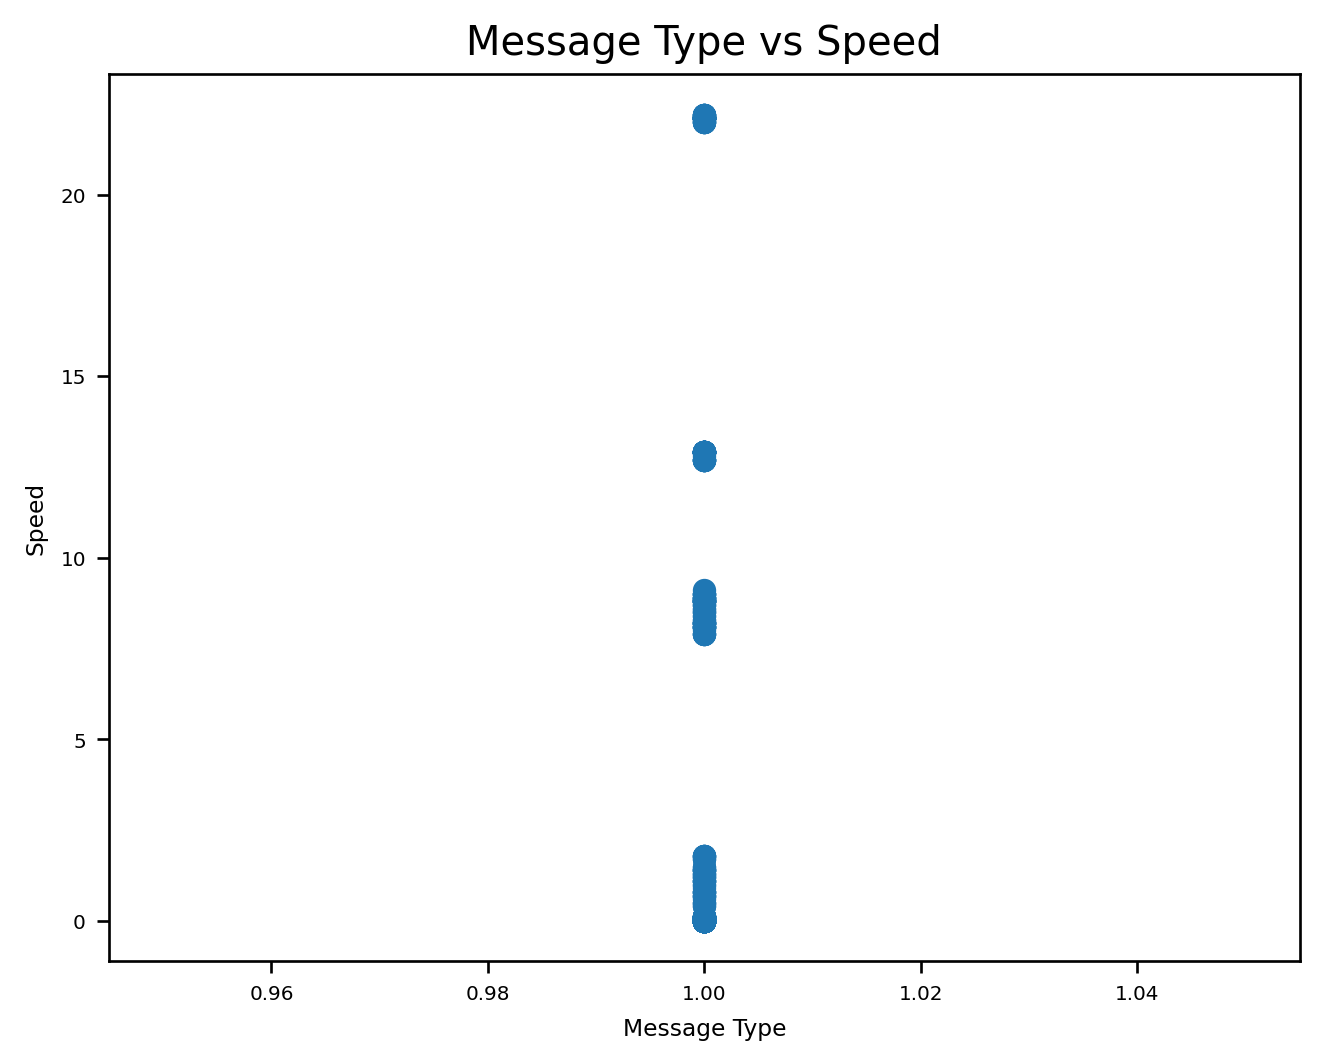

In [19]:
#scatter plot - only message type 1
plt.scatter(msg_type_1_speed['msg_type'], msg_type_1_speed['speed'])
plt.xlabel('Message Type')
plt.ylabel('Speed')
plt.title('Message Type vs Speed')
plt.show()

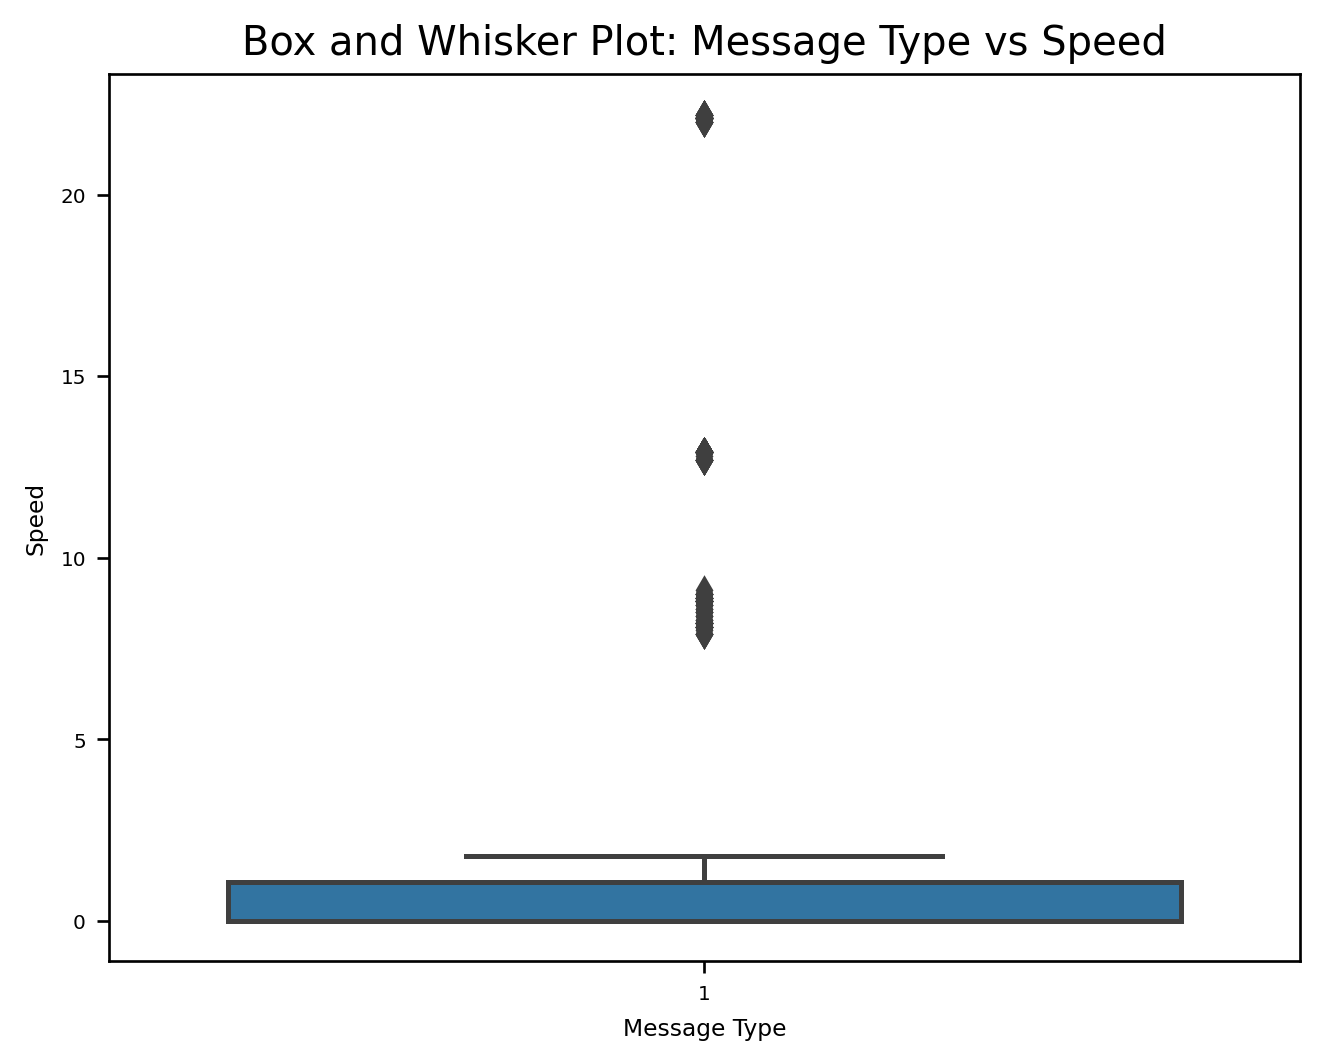

In [20]:
#box and whisker plot - only message type 1
sns.boxplot(x='msg_type', y='speed', data=msg_type_1_speed)
plt.xlabel('Message Type')
plt.ylabel('Speed')
plt.title('Box and Whisker Plot: Message Type vs Speed')
plt.show()

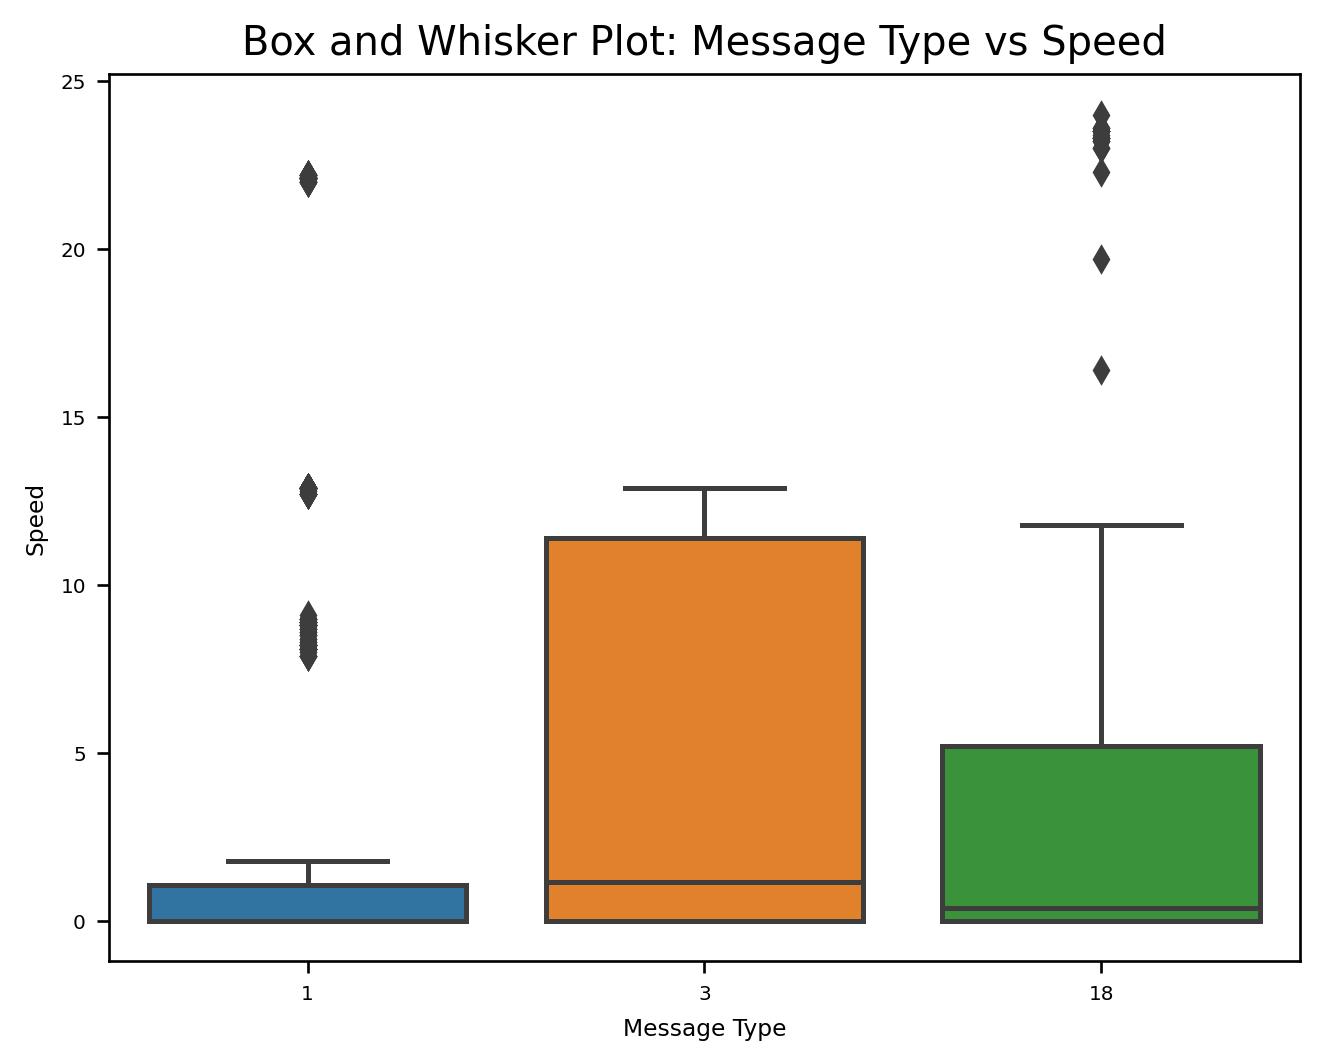

In [21]:
#box and whisker plot - all speed data
sns.boxplot(x='msg_type', y='speed', data=final_speed_data)
plt.xlabel('Message Type')
plt.ylabel('Speed')
plt.title('Box and Whisker Plot: Message Type vs Speed')
plt.show()

In [22]:
final_lon_lat_data = lon_lat_data.dropna()

In [23]:
final_lon_lat_data

,msg_type,mmsi,lon,lat
0,4,002766160-A-4,25.500053,59.645888
2,1,276538000-B-1-UnderWayUsingEngine,24.713998,59.462525
3,18,276007420-A-18,24.759658,59.555717
4,1,276643000-A-1-EngagedInFishing,24.347427,59.573597
5,1,276841000-B-1-UnderWayUsingEngine,24.814323,59.499160
...,...,...,...,...
1430,1,276330000-A-1-UnderWayUsingEngine,24.792167,59.558783
1431,1,276003580-A-1-UnderWayUsingEngine,24.669495,59.451380
1432,1,276829000-A-1-UnderWayUsingEngine,24.753918,59.694997
1433,21,992761005-A-21,25.072603,59.628142


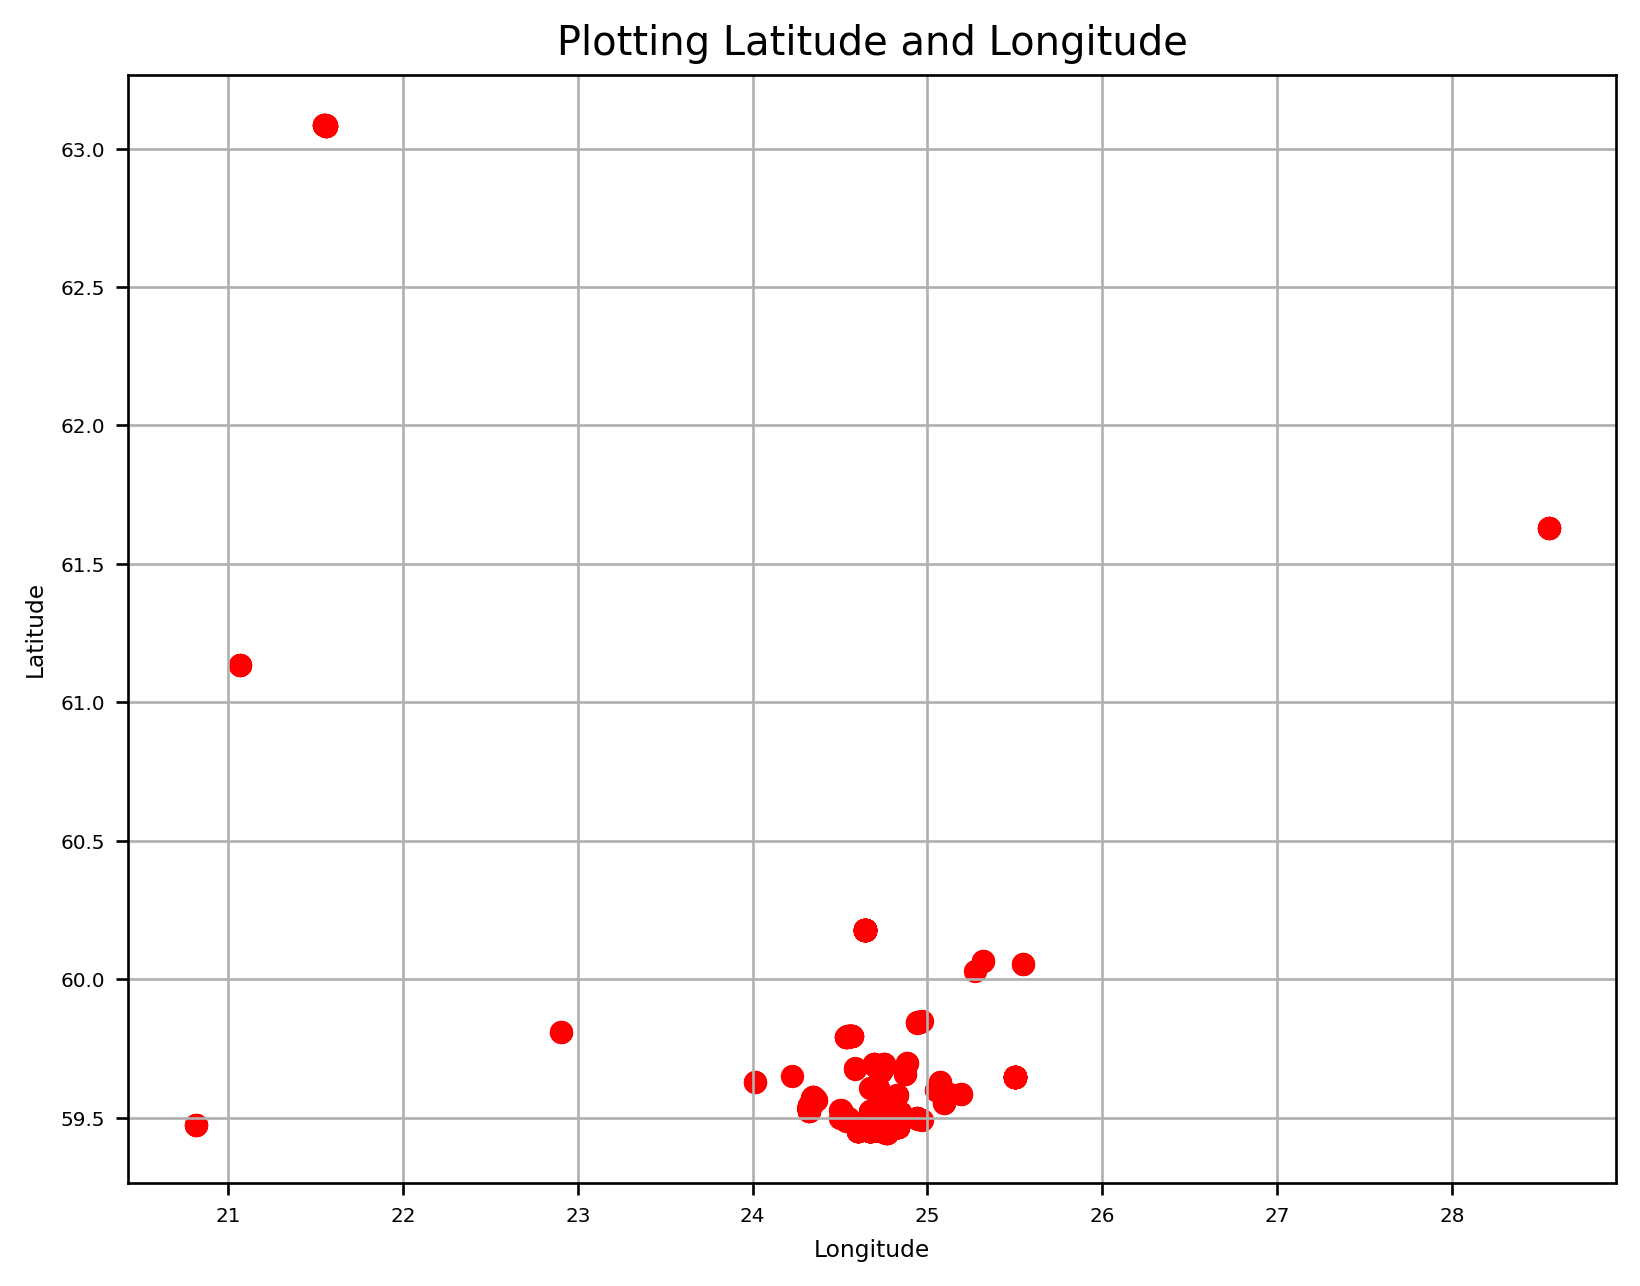

In [24]:
#latitude and longitude plot
longitude = final_lon_lat_data.iloc[:,2]  # longitude values
latitude= final_lon_lat_data.iloc[:,3]   # latitude values

# Plotting the coordinates
plt.figure(figsize=(8, 6))
plt.scatter(longitude, latitude, color='red', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plotting Latitude and Longitude')
plt.grid(True)
plt.show()

In [25]:
#pip install folium

In [26]:
#plot coordinates on a map
import folium

#estimated latitude and longitude of AIS receiver based on Estonia
latitude_centre = 58.5
longitude_centre = 24.5

# Create a map centered on a specific latitude and longitude
map = folium.Map(location=[latitude_centre, longitude_centre], zoom_start=5)

# Iterate through the latitude and longitude coordinates
for lat, lon in zip(latitude, longitude):
    # Add a marker for each coordinate
    folium.Marker(
        location=[lat, lon],
        popup='Latitude: {}, Longitude: {}'.format(lat, lon)
    ).add_to(map)

# Display the map
map

In [27]:
#Separating Potential Outliers
#Speed outliers
speed_outliers = final_speed_data.loc[((final_speed_data['speed'] > 5) & (final_speed_data['msg_type'] == 1)) | ((final_speed_data['speed'] > 15) & (final_speed_data['msg_type'] == 18))]

In [28]:
speed_outliers

,msg_type,mmsi,speed
3,18,276007420-A-18,23.6
17,1,276785000-A-1-UnderWayUsingEngine,8.1
19,1,276829000-A-1-UnderWayUsingEngine,22.1
28,1,538008636-A-1-UnderWayUsingEngine,12.9
40,18,276007420-A-18,23.0
...,...,...,...
1403,1,276829000-B-1-UnderWayUsingEngine,22.1
1411,1,309175000-B-1-UnderWayUsingEngine,9.0
1420,1,538008636-B-1-UnderWayUsingEngine,12.9
1422,1,405000238-A-1-UnderWayUsingEngine,12.8


In [29]:
#unique mmsi values
np.unique(speed_outliers["mmsi"])

array(['276007420-A-18', '276007420-B-18',
       '276785000-A-1-UnderWayUsingEngine',
       '276785000-B-1-UnderWayUsingEngine',
       '276829000-A-1-UnderWayUsingEngine',
       '276829000-B-1-UnderWayUsingEngine',
       '309175000-A-1-UnderWayUsingEngine',
       '309175000-B-1-UnderWayUsingEngine',
       '405000238-A-1-UnderWayUsingEngine',
       '405000238-B-1-UnderWayUsingEngine',
       '538008636-A-1-UnderWayUsingEngine',
       '538008636-B-1-UnderWayUsingEngine',
       '613889000-A-1-UnderWayUsingEngine',
       '613889000-B-1-UnderWayUsingEngine'], dtype=object)

In [30]:
#Statistical Analysis for all separated datasets
#Speed data 


In [31]:
#Graphing/Plotting for all separated datasets

In [32]:
#only rows where msg_type = 1
msg_type_1_speed = final_speed_data.loc[final_speed_data["msg_type"] == 1]

In [33]:
msg_type_1_speed.describe() #statistical overview

,msg_type,speed
count,634.0,634.00000
mean,1.0,2.96041
std,0.0,6.15208
min,1.0,0.00000
25%,1.0,0.00000
50%,1.0,0.00000
75%,1.0,1.07500
max,1.0,22.20000


In [34]:
msg_type_3_speed = final_speed_data.loc[final_speed_data["msg_type"] == 3]

In [35]:
msg_type_3_speed.describe() #statistical overview

,msg_type,speed
count,308.0,308.000000
mean,3.0,4.043831
std,0.0,5.197230
min,3.0,0.000000
25%,3.0,0.000000
50%,3.0,1.150000
75%,3.0,11.400000
max,3.0,12.900000


In [36]:
msg_type_18_speed = final_speed_data.loc[final_speed_data["msg_type"] == 18]

In [38]:
msg_type_18_speed.describe() #statistical overview

,msg_type,speed
count,127.0,127.000000
mean,18.0,4.972441
std,0.0,8.333587
min,18.0,0.000000
25%,18.0,0.000000
50%,18.0,0.400000
75%,18.0,5.200000
max,18.0,24.000000


In [39]:
speed_outliers.describe()

,msg_type,speed
count,154.000000,154.000000
mean,3.318182,14.955195
std,5.852997,6.267178
min,1.000000,7.900000
25%,1.000000,8.800000
50%,1.000000,12.900000
75%,1.000000,22.100000
max,18.000000,24.000000


In [41]:
lat_lon_outliers = final_lon_lat_data.loc[((final_lon_lat_data['lat'] == 60.177318))]

In [42]:
lat_lon_outliers

,msg_type,mmsi,lon,lat
55,4,002300108-A-4,24.640202,60.177318
1129,4,002300108-A-4,24.640198,60.177318
1140,4,002300108-B-4,24.640198,60.177318
1181,4,002300108-A-4,24.640193,60.177318
